0.14499815458068518


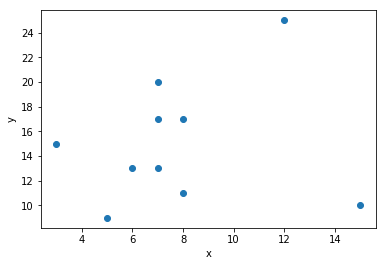

In [289]:
# Correlation and Regression Lines - A Quick Recap #1
# Compute Pearson's coefficient 

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
y = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]
xbar = np.mean(x)
ybar = np.mean(y)

print( np.sum((x-xbar)*(y-ybar))/math.sqrt(np.sum((x-xbar)**2)*np.sum((y-ybar)**2)) )

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [296]:
# Correlation and Regression Lines - A Quick Recap #2
import numpy as np

x = np.asarray([15, 12, 8, 8, 7, 7, 7, 6, 5, 3])
x = x.reshape(-1,1)
y = np.asarray([10, 25, 17, 11, 13, 17, 20, 13, 9, 15])

# Using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model = model.fit(x, y)
print(model.coef_, model.intercept_)

# Using normal equation
def preprocess(x):
    return( np.concatenate((x, np.full((len(x),1), 1.)), axis = 1) )

x = preprocess(x)
w = np.matmul(np.matmul( np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x) ), y)
print(w)

[0.20833333] 13.375
[ 0.20833333 13.375     ]


array([15.45833333])

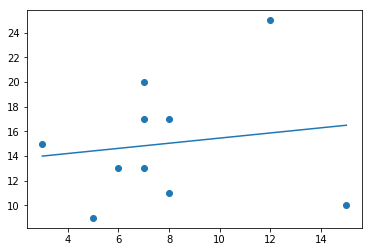

In [1344]:
# Correlation and Regression Lines - A quick recap #3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline 

x = [[15], [12], [8], [8], [7], [7], [7], [6], [5], [3]]
y = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]

model = make_pipeline(PolynomialFeatures(degree = 1), LinearRegression())
model.fit(x, y)
plt.scatter(x, y)
plt.plot(x, model.predict(x))

model.predict([[10]])

8.5

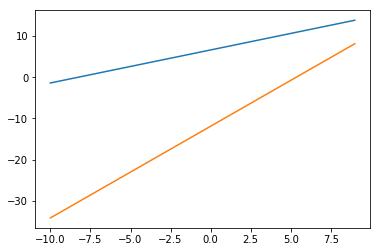

In [1350]:
# Correlation and Regression Lines - A quick recap #4
import matplotlib.pyplot as plt
%matplotlib inline 

x1 = [x for x in range(-10,10,1)]
y1 = [(4*x + 33)/5 for x in range(-10,10,1)]

x2 = [x for x in range(-10,10,1)]
y2 = [(20*x -107)/9 for x in range(-10,10,1)]

plt.plot(x1, y1)
plt.plot(x2, y2)

(9*7+107)/20

In [202]:
# Day 6: Multiple Linear Regression: Predicting House Prices
def inputData():
    f, n = map(int, input().split())
    x_train = []
    y_train = []
    for i in range(n):
        tmp = list(map(float, input().split()))
        x_train.append(tmp[:-1])
        y_train.append(tmp[-1])
    m  = int(input())
    x_test = []
    for i in range(m):
        x_test.append(list(map(float, input().split())))
    return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test)

def outputData(res):
    for i in range(len(res)):
        print(res[i])
    
def preprocess(x):
    return( np.concatenate((x, np.full((len(x),1), 1.), \
                               (x[:,0]**2).reshape(len(x),1), \
                               (x[:,1]**2).reshape(len(x),1), \
                               (x[:,0]*x[:,1]).reshape(len(x),1)), axis = 1) )

#x_train, y_train, x_test = inputData()
x_train = np.asarray([[0.18, 0.89], [1.0, 0.26], [0.92, 0.11], [0.07, 0.37], [0.85, 0.16], [0.99, 0.41], [0.87, 0.47]]) 
y_train = np.asarray([109.85, 155.72, 137.66, 76.17, 139.75, 162.6, 151.77])
x_test = np.asarray([[0.49, 0.18], [0.57, 0.83], [0.56, 0.64], [0.76, 0.18]])

# Using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=False))
y_pred = model.fit(x_train, y_train).predict(x_test)
print(y_pred)

# Using normal equation
import numpy as np
x_train = preprocess(x_train)
x_test = preprocess(x_test)
w = np.matmul(np.matmul( np.linalg.inv(np.matmul(np.transpose(x_train), x_train)), np.transpose(x_train) ), y_train)
outputData(np.matmul(x_test, w))

[102.76466618 133.34529589 135.03649408 130.30548218]
102.76466618434463
133.34529589397394
135.03649408253466
130.30548217755097
